# Modularity Clustering

In [1]:
import numpy as np
import pygraphviz as pgv
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

The next two functions are used to visualize (using graphviz) the graph represented by an adjacency matrix. 

In [2]:
def getGraph(adjMat):
    ''' creates a graphviz graph from an adjacency matrix
    adjMat: (numpy.array) adjacency matrix
    
    returns: graphviz graph
    '''
    elist = []
    for i in range(0, adjMat.shape[0]):
        for j in range(i+1, adjMat.shape[0]):
            if adjMat[i,j] == 1:
                elist.append((str(i), str(j)))
    G=pgv.AGraph()
    G.add_edges_from(elist)
    G.layout()
    return G

def getImg(G):
    ''' creates image from the graphviz graph
    G: graphviz graph
    
    returns: (numpy.array) image
    '''
    G.draw("graph.png")
    im = cv2.imread("graph.png")
    os.remove("graph.png")
    return im

An example of graph:

In [3]:
adjMat=np.array([[0, 1, 1, 1, 0, 0],
                 [1, 0, 1, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 0, 0, 0, 1, 1],
                 [0, 0, 0, 1, 0, 1],
                 [0, 0, 0, 1, 1, 0]])

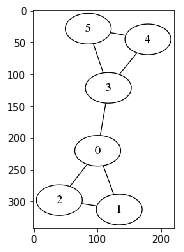

In [4]:
G = getGraph(adjMat)
plt.imshow(getImg(G))

function that color nodes according to their cluster:

In [5]:
def getModularityMatrix(adjMat):
    TwoM=np.sum(adjMat)
    k=np.sum(adjMat, axis=0)
    return adjMat - np.outer(k,k)/TwoM

In [6]:
M=getModularityMatrix(adjMat)
w, v = np.linalg.eig(M)
idx = w.argsort()[::-1]
print "Eigenvalues:"
print np.array_str(w[idx], precision=2, suppress_small=True)
print "Eigenvectos:"
print np.array_str(v[:,idx], precision=2, suppress_small=True), 

Eigenvalues:
[ 2.41  1.73 -0.41 -1.   -1.   -1.73]
Eigenvectos:
[[ 0.5   0.33  0.5  -0.    0.   -0.63]
 [ 0.35  0.44 -0.35 -0.71  0.26  0.23]
 [ 0.35  0.44 -0.35  0.71 -0.26  0.23]
 [ 0.5  -0.33  0.5  -0.    0.    0.63]
 [ 0.35 -0.44 -0.35  0.   -0.66 -0.23]
 [ 0.35 -0.44 -0.35  0.    0.66 -0.23]]
